In [2]:
from SGD import *

sgd = SGD(learning_rate=0.05)
sgd.train(xtrain, ytrain, batch_size=10, epoch_count=20)

Epoch: 0. Total error: 7.049880970787065
Epoch: 1. Total error: 3.10260124716219
Epoch: 2. Total error: 2.43406126852308
Epoch: 3. Total error: 2.115432638522957
Epoch: 4. Total error: 1.039244470061191
Epoch: 5. Total error: 1.0528290098179502
Epoch: 6. Total error: 1.0158446318463281
Epoch: 7. Total error: 1.5083161826124678
Epoch: 8. Total error: 3.5064360236424377
Epoch: 9. Total error: 0.6871442836381345
Epoch: 10. Total error: 1.0666330569816733
Epoch: 11. Total error: 1.584456010147803
Epoch: 12. Total error: 1.0193125077170138
Epoch: 13. Total error: 1.7824202701226233
Epoch: 14. Total error: 1.4456244143990955
Epoch: 15. Total error: 1.1146396086211632
Epoch: 16. Total error: 1.5672736538721466
Epoch: 17. Total error: 2.295380012308468
Epoch: 18. Total error: 1.779366241274387
Epoch: 19. Total error: 1.8815356674568087


In [3]:
sgd.weight

array([ 0.11641274,  0.91723467, -1.20484223])

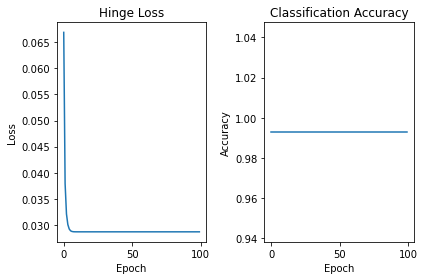

In [1]:
## Dataset tiny

import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

svm = LinearSVM(lr=0.5, C=0.01, max_iters=100, show_plot=False, batch_size=20)
svm.fit(xtrain, ytrain)

plt.subplot(1,2,1)
plt.title("Hinge Loss")
plt.plot(svm.losses)
plt.xlabel("Epoch"); plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Classification Accuracy")
plt.plot(svm.accuracies)
plt.xlabel("Epoch"); plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

100%|██████████| 7/7 [00:43<00:00,  6.26s/it]
[('lr:0.5, C:0.01', 0.9928571428571429),
 ('lr:0.5, C:0.1', 0.9928571428571429),
 ('lr:1, C:0.01', 0.9928571428571429),
 ('lr:1, C:0.1', 0.9928571428571429),
 ('lr:3, C:0.01', 0.9928571428571429)]
1.0


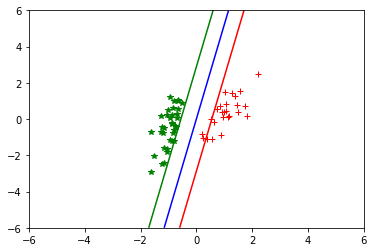

In [3]:
from pprint import pprint
from CV import cross_validation_score

lrs = [0.01, 0.1, 0.5, 1, 3, 5, 7]; Cs = [0.01, 0.1, 0.5, 1, 3, 5, 7]
results = {}

for lr in tqdm(lrs):
    for C in Cs:
        svm = LinearSVM(lr=lr, C=C)
        results[f'lr:{lr}, C:{C}'] = cross_validation_score(svm, xtrain, ytrain, k=5)

results = sorted(results.items(), key=lambda l:l[1], reverse=True)[:5]
pprint(results)

# best hyperparameters
lr = 0.5; C = 0.01
svm = LinearSVM(lr=lr, C=C)
svm.fit(xtrain, ytrain)

# classification accuracy
print(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest))
svm.plot_margin(np.c_[xtest, np.ones(xtest.shape[0])], ytest)

100%|██████████| 5/5 [00:09<00:00,  1.80s/it]


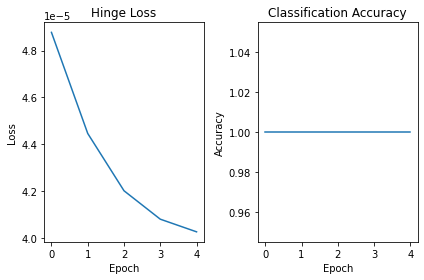

[4.8774907265848214e-05, 4.446773551778721e-05, 4.2025701701031615e-05, 4.0814899008148516e-05, 4.027626342063185e-05]
[0.9999785714285714, 0.9999785714285714, 0.9999785714285714, 0.9999785714285714, 0.9999785714285714]


In [3]:
## Dataset large

import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

svm = LinearSVM(lr=5, C=0.1, max_iters=5, show_plot=False, batch_size=200)
svm.fit(xtrain, ytrain, tqdm_toggle=True)

plt.subplot(1,2,1)
plt.title("Hinge Loss")
plt.plot(svm.losses)
plt.xlabel("Epoch"); plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Classification Accuracy")
plt.plot(svm.accuracies)
plt.xlabel("Epoch"); plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

print(svm.losses[-5:])
print(svm.accuracies[-5:])

In [4]:
from pprint import pprint
from CV import cross_validation_score

lrs = [0.01]; Cs = [0.01]#, 0.1, 0.5, 1, 3, 5, 7]
results = {}

for lr in tqdm(lrs):
    for C in Cs:
        print(lr, C)
        svm = LinearSVM(lr=lr, C=C, batch_size=200, max_iters=5)
        results[f'lr:{lr}, C:{C}'] = cross_validation_score(svm, xtrain, ytrain, k=5)
        print("yup")

results = sorted(results.items(), key=lambda l:l[1], reverse=True)[:5]
pprint(results)

# best hyperparameters
lr = 0.5; C = 0.01
svm = LinearSVM(lr=lr, C=C, batch_size=200, max_iters=5)
svm.fit(xtrain, ytrain)

# classification accuracy
print(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest))

  0%|          | 0/5 [00:00<?, ?it/s]0.01 0.01

100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

  0%|          | 0/100 [00:00<?, ?it/s]yup
[('lr:0.01, C:0.01', 1.0)]
100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
1.0


In [15]:
xtrain_c = np.c_[xtrain, np.ones(xtrain.shape[0])]
predictions = np.array([label * x for x, label in zip(np.dot(svm.weights, xtrain_c.T), ytrain)])
incorrect = predictions[predictions<0]
len(incorrect)

0

In [18]:
print(f"{len(ytrain[ytrain>0]) / len(ytrain) *100} % positive class samples") # => roughly balanced dataset

50.01 % positive class samples


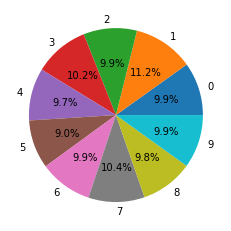

  0%|          | 0/600 [00:00<?, ?it/s]
Epoch: 1 / 5 ... 
  0%|          | 0/600 [00:00<?, ?it/s]
Epoch: 2 / 5 ... 
  0%|          | 0/600 [00:00<?, ?it/s]
Epoch: 3 / 5 ... 
  0%|          | 1/600 [00:00<01:01,  9.73it/s]
Epoch: 4 / 5 ... 
  0%|          | 1/600 [00:00<01:01,  9.73it/s]
Epoch: 5 / 5 ... 
100%|██████████| 5/5 [04:25<00:00, 53.20s/it]


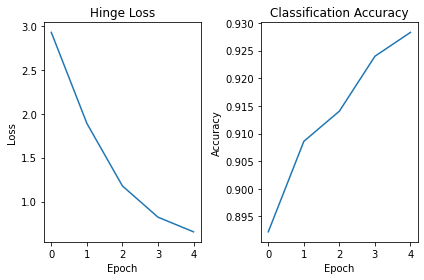

In [4]:
## MNIST-Dataset

from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
import seaborn as sns

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

counts = dict()
for x in np.unique(ytrain).astype(int):
    counts[x] = np.count_nonzero(ytrain == x)

plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

mc_svm = MultiClassSVM(lr=3, C=0.1, max_iters=5, batch_size=100)
mc_svm.train(xtrain, ytrain)

plt.subplot(1,2,1)
plt.title("Hinge Loss")
plt.plot(mc_svm.losses)
plt.xlabel("Epoch"); plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Classification Accuracy")
plt.plot(mc_svm.accuracies)
plt.xlabel("Epoch"); plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()